Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy Score: 0.811


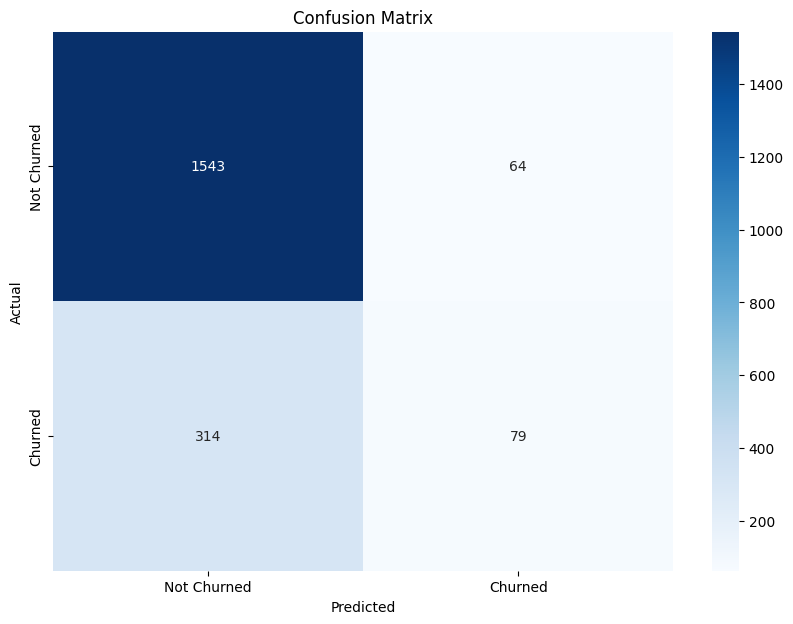

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Churn_Modelling.csv')

data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

features = data.drop(columns=['Exited'])
target = data['Exited']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_train, features_test, target_train, target_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(features_train, target_train)

target_pred = model.predict(features_test)

conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)
accuracy = accuracy_score(target_test, target_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:", accuracy)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
